In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
# TODO 
df = pd.read_csv("exp1.csv",index_col='t',names=names)

In [4]:
df.head(6)

,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


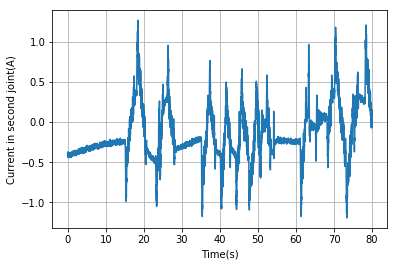

In [6]:
y = df.I2.values
t = df.index.values
plt.plot(t,y)
plt.xlabel("Time(s)")
plt.ylabel("Current in second joint(A)")
plt.grid()

In [11]:
yTrain = y
xTrain =np.transpose(np.array([df.q2, df.dq2,df.eps21, df.eps22, df.eps31, df.eps32, df.ddq2]))

In [12]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

In [13]:
regr.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
regr.intercept_

-0.08408083770447804

In [15]:
regr.coef_

array([ 0.06255018,  0.20584896,  0.00118784,  0.00044457, -0.0031362 ,
        0.00603298,  0.05487097])

In [18]:
yTrain_pred = regr.predict(xTrain)

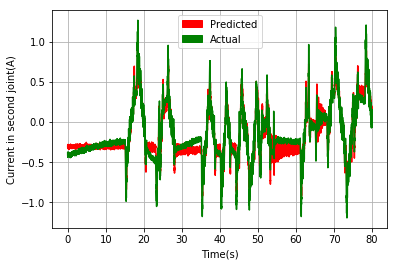

In [20]:
import matplotlib.patches as mpatches

plt.plot(t,yTrain_pred,'r')
plt.plot(t,yTrain,'g')
plt.xlabel("Time(s)")
plt.ylabel("Current in second joint(A)")
plt.grid()

red_patch = mpatches.Patch(color='red', label='Predicted')
green_patch = mpatches.Patch(color='green', label='Actual')
plt.legend(handles=[red_patch, green_patch])

In [24]:
ym = np.mean(y)
syy= np.mean((y-ym)**2)
n = y.shape
RSS_train = np.mean((yTrain_pred-yTrain)**2)/(np.std(yTrain)**2)
RSS_train = RSS_train/syy/n
Rsq_train = 1 - RSS_train
print(RSS_train)
print(Rsq_train)

[0.00010497]
[0.99989503]


In [26]:
test_df = pd.read_csv("exp2.csv",index_col='t',names=names)

In [28]:
test_df.head(6)

,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,1.9024,0.26063,-0.000364,4.940656e-321,0.012596,-0.096928,-0.15134,-0.017005,-130.83,-41.856,-6.3635,5.13410,-0.045712,6.210306e-319,1.582900
0.01,0.000013,1.9024,0.26073,0.000739,4.940656e-321,0.012095,-0.028908,-0.11903,-0.020406,-138.18,-51.100,-14.6590,-5.05820,0.125580,1.766878e-319,0.414660
0.02,-0.000007,1.9024,0.26086,-0.000580,4.940656e-321,0.011596,-0.059517,-0.13944,-0.047614,-139.36,-51.812,-14.6590,-5.29520,-0.130080,4.990557e-320,0.082286
0.03,0.000013,1.9024,0.26099,0.001409,4.940656e-321,0.013933,-0.079923,-0.15304,-0.023807,-135.57,-48.019,-11.3410,-0.79168,0.213010,1.394253e-320,0.190650
0.04,-0.000007,1.9024,0.26110,-0.001273,4.940656e-321,0.010793,-0.025507,-0.12924,-0.006802,-135.81,-49.204,-12.0520,-2.21390,-0.276490,3.581976e-321,-0.170400
0.05,-0.000007,1.9024,0.26124,0.001928,4.940656e-321,0.011915,-0.083324,-0.14964,-0.034010,-139.60,-53.471,-16.0820,-6.95450,0.323560,1.141292e-321,0.031745


[0.00020664]
[0.99979336]


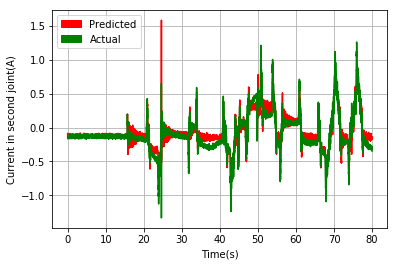

In [33]:
y = test_df.I2.values
t = test_df.index.values

yTest = y
xTest =np.transpose(np.array([test_df.q2, test_df.dq2,test_df.eps21, test_df.eps22, test_df.eps31, test_df.eps32, test_df.ddq2]))

yTest_pred = regr.predict(xTest)

plt.plot(t,yTest_pred,'r')
plt.plot(t,yTest,'g')
plt.xlabel("Time(s)")
plt.ylabel("Current in second joint(A)")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Predicted')
green_patch = mpatches.Patch(color='green', label='Actual')
plt.legend(handles=[red_patch, green_patch])

ym = np.mean(yTest)
syy= np.mean((yTest-ym)**2)
n = yTest.shape
RSS_test = np.mean((yTest_pred-yTest)**2)/(np.std(yTest)**2)
RSS_test = RSS_test/syy/n
Rsq_test = 1 - RSS_test
print(RSS_test)
print(Rsq_test)
